In [281]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import difflib
import re
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import IFrame
import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import numpy as np
import pickle
from sklearn import datasets 
from sklearn.metrics import silhouette_score
from IPython.display import IFrame

In [46]:
url ="https://www.billboard.com/charts/hot-100/"

In [47]:
response = requests.get(url)

In [48]:
response.content

b'<!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6" lang="en-US">\n<![endif]-->\n<!--[if IE 7]>\n<html id="ie7" lang="en-US">\n<![endif]-->\n<!--[if IE 8]>\n<html id="ie8" lang="en-US">\n<![endif]-->\n<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->\n<html lang="en-US">\n<!--<![endif]-->\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<meta name="theme-color" content="#ffffff">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\t\n<!-- Add to home screen for iOS -->\n<meta name="apple-mobile-web-app-status-bar-style" content="black-translucent">\n<link rel="apple-touch-icon" sizes="180x180" href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png">\n\n<!-- Tile icons for Windows -->\n<meta name="msapplication-config" content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml">\n<meta name="msapplication-TileImage" c

In [49]:
response.status_code

200

In [50]:
soup = BeautifulSoup(response.content, "html.parser")

In [51]:
soup

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil

In [52]:
soup.select(".c-label.a-no-trucate") #name of the artist

[<span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Harry Styles
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Jack Harlow
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only">
 	
 	Glass Animals
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-

In [53]:
soup.select(".c-title.a-no-trucate") #title of the song

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					As It Was		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					First Class		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Heat Waves		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spaci

In [54]:
soup.select(".c-label.a-no-trucate")[0]
soup.select(".c-label.a-no-trucate")[0].get_text().strip()

'Harry Styles'

In [55]:
song= []
artist= []

In [56]:
num_iter = len(soup.select(".c-label.a-no-trucate"))

In [57]:
for i in range(num_iter):
    artist.append(soup.select(".c-label.a-no-trucate")[i].get_text(strip= True)) ## getting artist name
    song.append(soup.select(".c-title.a-no-trucate")[i].get_text(strip= True)) ## getting song name

In [58]:
song

['As It Was',
 'First Class',
 'Heat Waves',
 'Big Energy',
 'Enemy',
 'Stay',
 "Don't Think Jesus",
 'Woman',
 'Super Gremlin',
 'Ghost',
 'Thats What I Want',
 'Bad Habits',
 'abcdefu',
 'Shivers',
 'Cold Heart (PNAU Remix)',
 'Easy On Me',
 'Need To Know',
 'Save Your Tears',
 'One Right Now',
 'In A Minute',
 'Levitating',
 "'Til You Can't",
 'Industry Baby',
 'MAMIII',
 'Bam Bam',
 'Hrs And Hrs',
 "We Don't Talk About Bruno",
 'Right On',
 'Never Say Never',
 "Doin' This",
 'Wasted On You',
 'AA',
 'Good 4 U',
 'Sweetest Pie',
 'Fingers Crossed',
 'I Hate U',
 'Boyfriend',
 'To The Moon!',
 'You Right',
 'Numb Little Bug',
 'Fancy Like',
 'Sand In My Boots',
 'What Happened To Virgil',
 'Pushin P',
 'Beers On Me',
 'The Motto',
 "She's All I Wanna Be",
 "When You're Gone",
 'Buy Dirt',
 'About Damn Time',
 'Shake It',
 'Light Switch',
 'If I Was A Cowboy',
 'Peru',
 'Flowers',
 'Nail Tech',
 'Freaky Deaky',
 '23',
 'Trouble With A Heartbreak',
 'Broadway Girls',
 'Heart On Fire',


In [59]:
for i in range(len(song)):
    song[i] = song[i].lower()
song

['as it was',
 'first class',
 'heat waves',
 'big energy',
 'enemy',
 'stay',
 "don't think jesus",
 'woman',
 'super gremlin',
 'ghost',
 'thats what i want',
 'bad habits',
 'abcdefu',
 'shivers',
 'cold heart (pnau remix)',
 'easy on me',
 'need to know',
 'save your tears',
 'one right now',
 'in a minute',
 'levitating',
 "'til you can't",
 'industry baby',
 'mamiii',
 'bam bam',
 'hrs and hrs',
 "we don't talk about bruno",
 'right on',
 'never say never',
 "doin' this",
 'wasted on you',
 'aa',
 'good 4 u',
 'sweetest pie',
 'fingers crossed',
 'i hate u',
 'boyfriend',
 'to the moon!',
 'you right',
 'numb little bug',
 'fancy like',
 'sand in my boots',
 'what happened to virgil',
 'pushin p',
 'beers on me',
 'the motto',
 "she's all i wanna be",
 "when you're gone",
 'buy dirt',
 'about damn time',
 'shake it',
 'light switch',
 'if i was a cowboy',
 'peru',
 'flowers',
 'nail tech',
 'freaky deaky',
 '23',
 'trouble with a heartbreak',
 'broadway girls',
 'heart on fire',


In [60]:
artist

['Harry Styles',
 'Jack Harlow',
 'Glass Animals',
 'Latto',
 'Imagine Dragons X JID',
 'The Kid LAROI & Justin Bieber',
 'Morgan Wallen',
 'Doja Cat',
 'Kodak Black',
 'Justin Bieber',
 'Lil Nas X',
 'Ed Sheeran',
 'GAYLE',
 'Ed Sheeran',
 'Elton John & Dua Lipa',
 'Adele',
 'Doja Cat',
 'The Weeknd & Ariana Grande',
 'Post Malone & The Weeknd',
 'Lil Baby',
 'Dua Lipa',
 'Cody Johnson',
 'Lil Nas X & Jack Harlow',
 'Becky G X Karol G',
 'Camila Cabello Featuring Ed Sheeran',
 'Muni Long',
 'Carolina Gaitan, Mauro Castillo, Adassa, Rhenzy Feliz, Diane Guerrero, Stephanie Beatriz & Encanto Cast',
 'Lil Baby',
 'Cole Swindell / Lainey Wilson',
 'Luke Combs',
 'Morgan Wallen',
 'Walker Hayes',
 'Olivia Rodrigo',
 'Megan Thee Stallion & Dua Lipa',
 'Lauren Spencer-Smith',
 'SZA',
 'Dove Cameron',
 'JNR CHOI & Sam Tompkins',
 'Doja Cat & The Weeknd',
 'Em Beihold',
 'Walker Hayes',
 'Morgan Wallen',
 'Lil Durk Featuring Gunna',
 'Gunna & Future Featuring Young Thug',
 'Dierks Bentley, BREL

In [61]:
dict ={"song" : song, "artist": artist}

In [62]:
dict

{'song': ['as it was',
  'first class',
  'heat waves',
  'big energy',
  'enemy',
  'stay',
  "don't think jesus",
  'woman',
  'super gremlin',
  'ghost',
  'thats what i want',
  'bad habits',
  'abcdefu',
  'shivers',
  'cold heart (pnau remix)',
  'easy on me',
  'need to know',
  'save your tears',
  'one right now',
  'in a minute',
  'levitating',
  "'til you can't",
  'industry baby',
  'mamiii',
  'bam bam',
  'hrs and hrs',
  "we don't talk about bruno",
  'right on',
  'never say never',
  "doin' this",
  'wasted on you',
  'aa',
  'good 4 u',
  'sweetest pie',
  'fingers crossed',
  'i hate u',
  'boyfriend',
  'to the moon!',
  'you right',
  'numb little bug',
  'fancy like',
  'sand in my boots',
  'what happened to virgil',
  'pushin p',
  'beers on me',
  'the motto',
  "she's all i wanna be",
  "when you're gone",
  'buy dirt',
  'about damn time',
  'shake it',
  'light switch',
  'if i was a cowboy',
  'peru',
  'flowers',
  'nail tech',
  'freaky deaky',
  '23',
 

In [63]:
top100 = pd.DataFrame(dict)

top100

song                    artist
0      as it was              Harry Styles
1    first class               Jack Harlow
2     heat waves             Glass Animals
3     big energy                     Latto
4          enemy     Imagine Dragons X JID
..           ...                       ...
95       p power     Gunna Featuring Drake
96  money so big                      Yeat
97  blick blick!   Coi Leray & Nicki Minaj
98  fall in love          Bailey Zimmerman
99  x ultima vez  Daddy Yankee & Bad Bunny

[100 rows x 2 columns]

In [64]:
def nombre():
    name= input("Write a song: ").lower()
    def mistake(name):
        x= difflib.get_close_matches(name,song,4, 0.8)
        print ("Did you mean: ", x)
    if name in song:
        def selectRandom(song):
            return random.choice(song)
        print ("We recommend you this song: ", selectRandom(song).title())
    else: 
        print ("Sorry, this song is not in the top 100 Billboard list.")

In [65]:
nombre() 

Write a song: Enemy
We recommend you this song:  Big Energy


In [66]:
name= input("Write a song: ")
x= difflib.get_close_matches(name,song,4, 0.8)
x

Write a song: enemi


['enemy']

In [67]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= "5c473c90dc924221bc335759e24ef9a7",
                                                           client_secret= "25639fd69e584df4a0dae33d60357719"))

In [68]:
results = sp.search(q="Lose yourself",limit=1,market="GB")
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Lose+yourself&type=track&market=GB&offset=0&limit=1',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
       'href': 'https://api.spotify.com/v1/artists/7dGJo4pcD2V6oG8kP0tJRR',
       'id': '7dGJo4pcD2V6oG8kP0tJRR',
       'name': 'Eminem',
       'type': 'artist',
       'uri': 'spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1rfORa9iYmocEsnnZGMVC4'},
     'href': 'https://api.spotify.com/v1/albums/1rfORa9iYmocEsnnZGMVC4',
     'id': '1rfORa9iYmocEsnnZGMVC4',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273b6ef2ebd34efb08cb76f6eec',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02b6ef2ebd34efb08cb76f6eec',
       'width': 300},
      {'height': 64,
       'url': 'https://i.

In [74]:
list_of_songs=[]
for index in range(0,len(results["tracks"]["items"])):
    list_of_songs.append(sp.audio_features(results["tracks"]["items"][index]["uri"])[0])
pd.DataFrame(list_of_songs)   

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.686   0.735    2    -4.616     1        0.264       0.00921   

   instrumentalness  liveness  valence    tempo            type  \
0           0.00066     0.342   0.0596  171.355  audio_features   

                       id                                   uri  \
0  1v7L65Lzy0j0vdpRjJewt1  spotify:track:1v7L65Lzy0j0vdpRjJewt1   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1v7L65Lzy0j0...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1v7L...       322227   

   time_signature  
0               4

In [75]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [76]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DWWEJlAGA9gs0"

In [77]:
def analyze_playlist(creator, playlist_id):
    
    playlist_features_list = ["artist", "album", "track_name", "track_id", "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "acousticness"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = get_playlist_tracks(creator, playlist_id)
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [78]:
playlist_df = analyze_playlist(playlist_creator, playlist_id)

In [79]:
playlist_df

artist  \
0      Johann Sebastian Bach   
1                  Lang Lang   
2       Ludwig van Beethoven   
3    Berliner Philharmoniker   
4       Sir Neville Marriner   
..                       ...   
143        Jerusalem Quartet   
144                Amy Beach   
145       Anne-Sophie Mutter   
146      Dmitri Shostakovich   
147            Michael Nyman   

                                                 album  \
0                     Bach: Cello Suites Nos. 1, 5 & 6   
1                          Piano Book (Deluxe Edition)   
2       Für Elise, Bagatelle No. 25 in A Minor, WoO 59   
3       Albinoni: Adagio in G minor / Pachelbel: Canon   
4                           Mozart: Academy in Concert   
..                                                 ...   
143                 Smetana & Janáček: String Quartets   
144  Beach: Variations on Balkan Themes Op. 60, Mar...   
145           Tchaikovsky / Korngold: Violin Concertos   
146  Shostakovich: Jazz Suites Nos. 1 - 2 / The Bol...   
147           The Piano: Music From The Motion Picture   

                                            track_name  \
0    Cello Suite No. 1 in G Major, BWV 1007: I. Pré...   
1    The Well-Tempered Clavier: Book 1, BWV 846-869...   
2      Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   
3            Suite No. 3 in D Major, BWV 1068: II. Air   
4    Pachelbel: Canon and Gigue for Three Violins a...   
..                                                 ...   
143  String Quartet No. 1 'Kreutzer Sonata': String...   
144                      Young Birches, Op. 128, No. 2   
145  Violin Concerto in D Major, Op. 35, TH. 59: II...   
146  Tahiti Trot, Op. 16 (orchestral transcription ...   
147                                        The Promise   

                   track_id danceability  energy key loudness mode  \
0    17i5jLpzndlQhbS4SrTd0B        0.275   0.157   7  -18.752    1   
1    4SFBV7SRNG2e2kyL1F6kjU        0.221   0.126   0  -25.427    1   
2    3zLTPuucd3e6TxZnu2dlVS        0.289  0.0306   9   -30.79    0   
3    7h6GoPvGHC9uzZJ8bNvfIq       0.0753    0.07   2  -27.272    1   
4    7B4HbpZCSfLzKGapKzlUPD        0.128   0.132   2   -17.67    1   
..                      ...          ...     ...  ..      ...  ...   
143  5UUNrbwbYIkNshq22NNKrX        0.194   0.101  11  -21.772    1   
144  4VVEfBXep7FdOt524jkfLF         0.24  0.0834   6  -29.545    0   
145  7hOLwSaTSkrqxSMzj4bXI1        0.405   0.318   9   -17.14    1   
146  76i4IBw3KsuDw783tvHB0e        0.291  0.0981   8  -23.156    1   
147  53ann6bENp7BF8uklrzQAp       0.0992   0.226   9   -14.84    0   

    speechiness instrumentalness liveness valence    tempo duration_ms  \
0        0.0636            0.842    0.186   0.304   73.289      152280   
1        0.0447            0.897    0.102   0.216   133.63      139307   
2        0.0446            0.911    0.102   0.118   125.61      212067   
3         0.044            0.947    0.146  0.0625   79.801      365147   
4        0.0353            0.942    0.107  0.0988   85.314      301587   
..          ...              ...      ...     ...      ...         ...   
143       0.048            0.714    0.221   0.074    91.74      266733   
144      0.0499            0.944   0.0804   0.188  169.621      159320   
145      0.0565            0.723    0.284   0.342  151.434      424653   
146      0.0398            0.865    0.275   0.194  138.168      249640   
147      0.0339            0.903    0.183  0.0605   79.518      256493   

    time_signature acousticness  
0                4         0.89  
1                4        0.989  
2                3        0.987  
3                4        0.918  
4                4        0.744  
..             ...          ...  
143              3        0.931  
144              4        0.978  
145              4        0.938  
146              4         0.95  
147              4        0.937  

[148 rows x 17 columns]

In [45]:
classical_essentials = sp.user_playlist_tracks("spotify", "37i9dQZF1DWWEJlAGA9gs0",market="DE")
classical_essentials

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWWEJlAGA9gs0/tracks?offset=0&limit=100&market=DE&additional_types=track',
 'items': [{'added_at': '2022-01-24T10:20:26Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5aIqB5nVVvmFsvSdExz408'},
       'href': 'https://api.spotify.com/v1/artists/5aIqB5nVVvmFsvSdExz408',
       'id': '5aIqB5nVVvmFsvSdExz408',
       'name': 'Johann Sebastian Bach',
       'type': 'artist',
       'uri': 'spotify:artist:5aIqB5nVVvmFsvSdExz408'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/5Dl3HXZjG6ZOWT5cV375lk'},
       'href': 'https://api.spotify.com/v1/artists/5Dl3HXZjG6ZOWT5cV375lk',
       'id': '5Dl3HXZj

In [101]:
playlist_dict = {
    "2000s" : ("spotify", "37i9dQZF1DX4o1oenSJRJd"), 
    "electro_swing" : ("Didrik Lomsdal Tønnessen", "7ehrAeEI4icxsqlvGX02gW"),
    "romance_songs" : ("1125622165", "4DyK1NIrIzWFmMcrJpUByV"),
    "peaceful_piano" : ("spotify", "37i9dQZF1DX4sWSpwq3LiO"), 
    "beast_mode" : ("spotify", "37i9dQZF1DX76Wlfdnj7AP"),
    "workout" : ("spotify", "37i9dQZF1DX70RN3TfWWJh"),
    "lofi_fruits" : ("Strange Fruits", "3LFIBdP7eZXJKqf3guepZ1"),
    "dark_techno" : ("moretinmusic", "5YHiYSUfcKgEDv9ZY54mcJ")
}

In [130]:
def analyze_playlist_dict(playlist_dict):
    
    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)
            
    return playlist_dict_df

In [131]:
multiple_playlist_df = analyze_playlist_dict(playlist_dict)

In [132]:
multiple_playlist_df= 

artist                                     album  \
0     Mary J. Blige                             No More Drama   
1           50 Cent                    Get Rich Or Die Tryin'   
2         Lady Gaga                                Just Dance   
3      Gwen Stefani                          The Sweet Escape   
4           Shakira  Oral Fixation, Vol. 2 (Expanded Edition)   
...             ...                                       ...   
1712        F.O.O.L                                  Revenger   
1713          KLOUD                                  AUTONOMY   
1714          CABLE                                  Vanisher   
1715    Extra Terra                                      ZION   
1716          KLOUD                                  THE HIVE   

                              track_name                track_id danceability  \
0                          Family Affair  3aw9iWUQ3VrPQltgwvN9Xu        0.911   
1                             In Da Club  7iL6o9tox1zgHpKUfh9vuC        0.899   
2                             Just Dance  5vQXxfGn1bjv5WESrYVVpw        0.821   
3                       The Sweet Escape  5BHtT1xpC44pGy1J7RKY4T        0.756   
4     Hips Don't Lie (feat. Wyclef Jean)  3ZFTkvIE7kyPt6Nu3PEa7V        0.778   
...                                  ...                     ...          ...   
1712                            Revenger  7AQyx6fF4zINWCuwVTGcx0        0.595   
1713                            INSOMNIA  0BgjJQn7Btv3vwqu6btbr8        0.599   
1714                            Vanisher  1Wu6bxVoI79qR4L9wEzz3c        0.632   
1715                            Morpheus  2oOKDKGvGfMyHyJAx7Ycn0        0.586   
1716                            THE HIVE  4U0XoomF06hMUbeGkGdBln        0.459   

     energy key loudness mode speechiness instrumentalness liveness valence  \
0     0.551   8    -3.75    0      0.0449         0.000041   0.0863   0.969   
1     0.713   6   -2.752    0       0.366                0   0.0708   0.777   
2     0.741   1    -4.57    0      0.0313         0.000025     0.19   0.741   
3      0.77   1   -3.502    1      0.0343                0    0.178    0.73   
4     0.824  10   -5.892    0      0.0707                0    0.405   0.758   
...     ...  ..      ...  ...         ...              ...      ...     ...   
1712  0.879   2    -3.83    1      0.0347            0.848    0.115   0.166   
1713  0.977   1   -3.307    1       0.057            0.822    0.076   0.519   
1714  0.673   0   -6.576    1      0.0336           0.0622    0.174  0.0533   
1715  0.951  10   -4.308    0      0.0471            0.889     0.12   0.545   
1716  0.971  10    -5.86    0      0.0464            0.405    0.103   0.467   

        tempo duration_ms time_signature acousticness     playlist  
0      92.887      265867              4        0.132        2000s  
1      90.051      193467              4        0.255        2000s  
2     118.984      244440              4       0.0278        2000s  
3     119.961      246467              4        0.191        2000s  
4     100.024      218093              4        0.284        2000s  
...       ...         ...            ...          ...          ...  
1712  110.012      222562              4      0.00048  dark_techno  
1713  111.003      180000              4      0.00181  dark_techno  
1714  100.016      240000              4      0.00109  dark_techno  
1715  108.011      200561              4      0.00232  dark_techno  
1716  115.046      200348              4      0.00176  dark_techno  

[1717 rows x 18 columns]

In [89]:
multiple_playlist_df["playlist"].value_counts()

peaceful_piano    491
lofi_fruits       291
romance_songs     288
beast_mode        200
2000s             150
electro_swing     120
workout           100
dark_techno        77
Name: playlist, dtype: int64

In [238]:
multiple_playlist_df_drop= multiple_playlist_df.drop(['artist', 'album', 'track_name', 'track_id', 'playlist','key', 'mode','duration_ms', 'time_signature'], axis = 1) 
multiple_playlist_df_drop

danceability energy loudness speechiness instrumentalness liveness  \
0           0.911  0.551    -3.75      0.0449         0.000041   0.0863   
1           0.899  0.713   -2.752       0.366                0   0.0708   
2           0.821  0.741    -4.57      0.0313         0.000025     0.19   
3           0.756   0.77   -3.502      0.0343                0    0.178   
4           0.778  0.824   -5.892      0.0707                0    0.405   
...           ...    ...      ...         ...              ...      ...   
1712        0.595  0.879    -3.83      0.0347            0.848    0.115   
1713        0.599  0.977   -3.307       0.057            0.822    0.076   
1714        0.632  0.673   -6.576      0.0336           0.0622    0.174   
1715        0.586  0.951   -4.308      0.0471            0.889     0.12   
1716        0.459  0.971    -5.86      0.0464            0.405    0.103   

     valence    tempo acousticness  cluster  
0      0.969   92.887        0.132        6  
1      0.777   90.051        0.255        3  
2      0.741  118.984       0.0278        6  
3       0.73  119.961        0.191        6  
4      0.758  100.024        0.284        5  
...      ...      ...          ...      ...  
1712   0.166  110.012      0.00048        4  
1713   0.519  111.003      0.00181        4  
1714  0.0533  100.016      0.00109        1  
1715   0.545  108.011      0.00232        4  
1716   0.467  115.046      0.00176        1  

[1717 rows x 10 columns]

In [218]:
multiple_playlist_df_drop_cluster= multiple_playlist_df_drop.drop("cluster", axis=1)
multiple_playlist_df_drop_cluster

danceability energy loudness speechiness instrumentalness liveness  \
0           0.911  0.551    -3.75      0.0449         0.000041   0.0863   
1           0.899  0.713   -2.752       0.366                0   0.0708   
2           0.821  0.741    -4.57      0.0313         0.000025     0.19   
3           0.756   0.77   -3.502      0.0343                0    0.178   
4           0.778  0.824   -5.892      0.0707                0    0.405   
...           ...    ...      ...         ...              ...      ...   
1712        0.595  0.879    -3.83      0.0347            0.848    0.115   
1713        0.599  0.977   -3.307       0.057            0.822    0.076   
1714        0.632  0.673   -6.576      0.0336           0.0622    0.174   
1715        0.586  0.951   -4.308      0.0471            0.889     0.12   
1716        0.459  0.971    -5.86      0.0464            0.405    0.103   

     valence    tempo acousticness  
0      0.969   92.887        0.132  
1      0.777   90.051        0.255  
2      0.741  118.984       0.0278  
3       0.73  119.961        0.191  
4      0.758  100.024        0.284  
...      ...      ...          ...  
1712   0.166  110.012      0.00048  
1713   0.519  111.003      0.00181  
1714  0.0533  100.016      0.00109  
1715   0.545  108.011      0.00232  
1716   0.467  115.046      0.00176  

[1717 rows x 9 columns]

In [220]:
scaler = StandardScaler()
scaler.fit(multiple_playlist_df_drop_cluster)
audio_features_scaled = scaler.transform(multiple_playlist_df_drop_cluster)
audio_features_scaled_df = pd.DataFrame(audio_features_scaled, columns = multiple_playlist_df_drop_cluster.columns)
display(multiple_playlist_df_drop_cluster.head())

print()
display(audio_features_scaled_df.head())

danceability energy loudness speechiness instrumentalness liveness valence  \
0        0.911  0.551    -3.75      0.0449         0.000041   0.0863   0.969   
1        0.899  0.713   -2.752       0.366                0   0.0708   0.777   
2        0.821  0.741    -4.57      0.0313         0.000025     0.19   0.741   
3        0.756   0.77   -3.502      0.0343                0    0.178    0.73   
4        0.778  0.824   -5.892      0.0707                0    0.405   0.758   

     tempo acousticness  
0   92.887        0.132  
1   90.051        0.255  
2  118.984       0.0278  
3  119.961        0.191  
4  100.024        0.284

danceability    energy  loudness  speechiness  instrumentalness  liveness  \
0      1.853182  0.607917  1.319771    -0.323638         -1.501262 -0.522037   
1      1.793628  1.096587  1.420814     4.930119         -1.501361 -0.659020   
2      1.406530  1.181049  1.236750    -0.546157         -1.501301  0.394425   
3      1.083948  1.268527  1.344880    -0.497072         -1.501361  0.288373   
4      1.193129  1.431417  1.102904     0.098495         -1.501361  2.294514   

    valence     tempo  acousticness  
0  2.638901 -0.633849     -1.164494  
1  1.847111 -0.731939     -0.876606  
2  1.698650  0.268779     -1.408380  
3  1.653287  0.302571     -1.026401  
4  1.768757 -0.386998     -0.808730

In [221]:
audio_features_scaled_df.describe()

danceability        energy      loudness   speechiness  \
count  1.717000e+03  1.717000e+03  1.717000e+03  1.717000e+03   
mean   1.123155e-16  7.836868e-17  2.404082e-16 -2.844098e-16   
std    1.000291e+00  1.000291e+00  1.000291e+00  1.000291e+00   
min   -2.355274e+00 -1.048854e+00 -2.684788e+00 -6.623257e-01   
25%   -7.820659e-01 -9.036410e-01 -9.417472e-01 -4.512592e-01   
50%    3.183362e-02 -4.749991e-01 -8.237620e-02 -3.416355e-01   
75%    8.060307e-01  1.057373e+00  1.044485e+00 -8.802848e-02   
max    2.200578e+00  1.944218e+00  1.682635e+00  1.096760e+01   

       instrumentalness      liveness       valence         tempo  \
count      1.717000e+03  1.717000e+03  1.717000e+03  1.717000e+03   
mean       5.623535e-16  2.085952e-16 -6.274668e-16  9.012075e-17   
std        1.000291e+00  1.000291e+00  1.000291e+00  1.000291e+00   
min       -1.501361e+00 -1.077924e+00 -1.252416e+00 -2.599797e+00   
25%       -1.488609e+00 -4.371958e-01 -7.798168e-01 -7.355702e-01   
50%        6.458042e-01 -3.302606e-01 -3.138155e-01  1.215751e-01   
75%        7.544909e-01 -1.004823e-01  6.264349e-01  5.806885e-01   
max        9.042370e-01  7.287773e+00  2.638901e+00  3.470986e+00   

       acousticness  
count  1.717000e+03  
mean   2.457104e-16  
std    1.000291e+00  
min   -1.473414e+00  
25%   -1.256946e+00  
50%    7.056086e-01  
75%    8.413607e-01  
max    8.577446e-01

In [240]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(audio_features_scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [223]:
kmeans.labels_

array([6, 3, 6, ..., 1, 4, 1], dtype=int32)

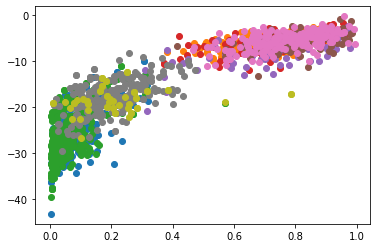

In [224]:
# assign a cluster to each example
labels = kmeans.predict(audio_features_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(multiple_playlist_df_drop.to_numpy()[row_ix, 1], multiple_playlist_df_drop.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [225]:
clusters = kmeans.predict(audio_features_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    292
1    198
2    470
3     89
4     70
5     85
6    212
7    245
8     56
dtype: int64

In [226]:
multiple_playlist_df["cluster"] = clusters
multiple_playlist_df

artist                                     album  \
0     Mary J. Blige                             No More Drama   
1           50 Cent                    Get Rich Or Die Tryin'   
2         Lady Gaga                                Just Dance   
3      Gwen Stefani                          The Sweet Escape   
4           Shakira  Oral Fixation, Vol. 2 (Expanded Edition)   
...             ...                                       ...   
1712        F.O.O.L                                  Revenger   
1713          KLOUD                                  AUTONOMY   
1714          CABLE                                  Vanisher   
1715    Extra Terra                                      ZION   
1716          KLOUD                                  THE HIVE   

                              track_name                track_id danceability  \
0                          Family Affair  3aw9iWUQ3VrPQltgwvN9Xu        0.911   
1                             In Da Club  7iL6o9tox1zgHpKUfh9vuC        0.899   
2                             Just Dance  5vQXxfGn1bjv5WESrYVVpw        0.821   
3                       The Sweet Escape  5BHtT1xpC44pGy1J7RKY4T        0.756   
4     Hips Don't Lie (feat. Wyclef Jean)  3ZFTkvIE7kyPt6Nu3PEa7V        0.778   
...                                  ...                     ...          ...   
1712                            Revenger  7AQyx6fF4zINWCuwVTGcx0        0.595   
1713                            INSOMNIA  0BgjJQn7Btv3vwqu6btbr8        0.599   
1714                            Vanisher  1Wu6bxVoI79qR4L9wEzz3c        0.632   
1715                            Morpheus  2oOKDKGvGfMyHyJAx7Ycn0        0.586   
1716                            THE HIVE  4U0XoomF06hMUbeGkGdBln        0.459   

     energy key loudness mode speechiness instrumentalness liveness valence  \
0     0.551   8    -3.75    0      0.0449         0.000041   0.0863   0.969   
1     0.713   6   -2.752    0       0.366                0   0.0708   0.777   
2     0.741   1    -4.57    0      0.0313         0.000025     0.19   0.741   
3      0.77   1   -3.502    1      0.0343                0    0.178    0.73   
4     0.824  10   -5.892    0      0.0707                0    0.405   0.758   
...     ...  ..      ...  ...         ...              ...      ...     ...   
1712  0.879   2    -3.83    1      0.0347            0.848    0.115   0.166   
1713  0.977   1   -3.307    1       0.057            0.822    0.076   0.519   
1714  0.673   0   -6.576    1      0.0336           0.0622    0.174  0.0533   
1715  0.951  10   -4.308    0      0.0471            0.889     0.12   0.545   
1716  0.971  10    -5.86    0      0.0464            0.405    0.103   0.467   

        tempo duration_ms time_signature acousticness     playlist  cluster  
0      92.887      265867              4        0.132        2000s        6  
1      90.051      193467              4        0.255        2000s        3  
2     118.984      244440              4       0.0278        2000s        6  
3     119.961      246467              4        0.191        2000s        6  
4     100.024      218093              4        0.284        2000s        5  
...       ...         ...            ...          ...          ...      ...  
1712  110.012      222562              4      0.00048  dark_techno        4  
1713  111.003      180000              4      0.00181  dark_techno        4  
1714  100.016      240000              4      0.00109  dark_techno        1  
1715  108.011      200561              4      0.00232  dark_techno        4  
1716  115.046      200348              4      0.00176  dark_techno        1  

[1717 rows x 19 columns]

In [227]:
kmeans.inertia_

3725.9134955693257

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

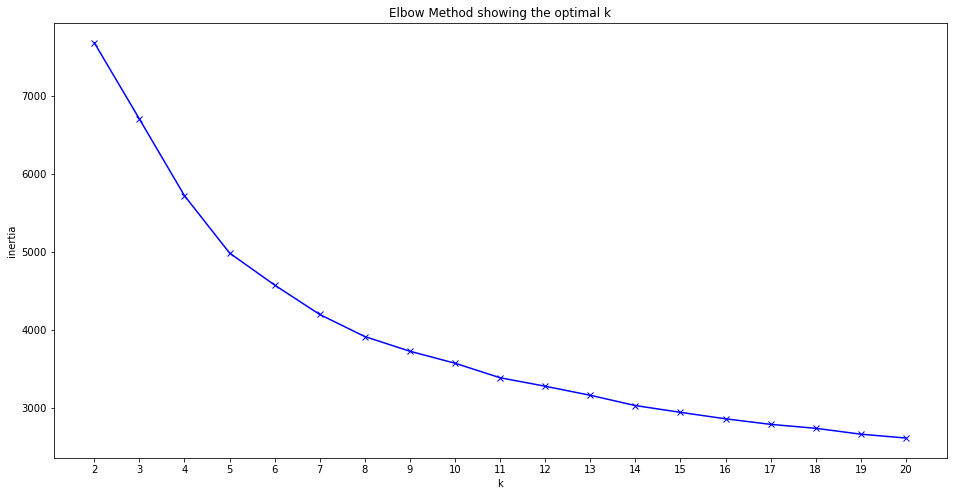

In [228]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

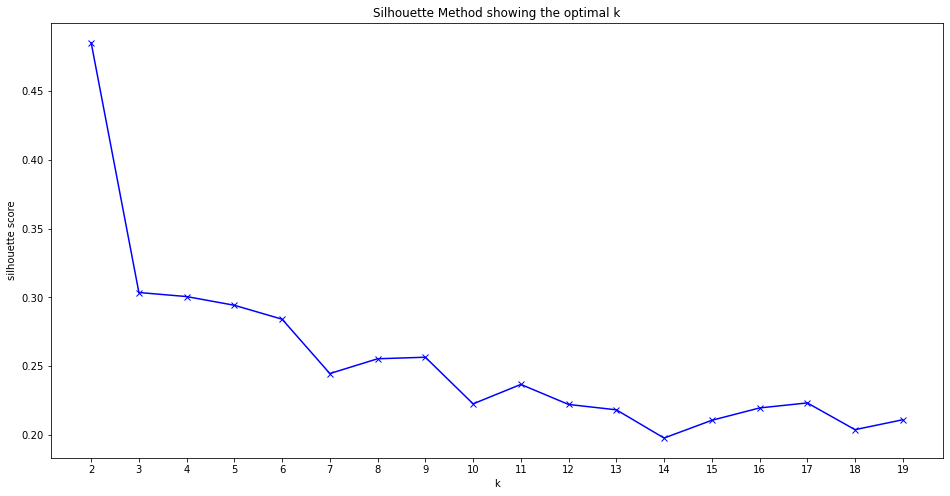

In [229]:
K = range(2, 20)
silhouette = []


for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(audio_features_scaled_df)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
   # with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(audio_features_scaled_df, kmeans.predict(audio_features_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [176]:
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_5.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [177]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [178]:
scaler2 = load("Model/scaler.pickle")

In [ ]:
#mistaken word
#def mistake(name):
        #x= difflib.get_close_matches(name,song,4, 0.8)
        #print ("Did you mean: ", x)

In [273]:
multiple_playlist_df_drop.insert(0,column = "track_id", value = multiple_playlist_df["track_id"])
multiple_playlist_df_drop=multiple_playlist_df_drop.set_index("track_id")
multiple_playlist_df_drop

danceability energy loudness speechiness  \
track_id                                                          
3aw9iWUQ3VrPQltgwvN9Xu        0.911  0.551    -3.75      0.0449   
7iL6o9tox1zgHpKUfh9vuC        0.899  0.713   -2.752       0.366   
5vQXxfGn1bjv5WESrYVVpw        0.821  0.741    -4.57      0.0313   
5BHtT1xpC44pGy1J7RKY4T        0.756   0.77   -3.502      0.0343   
3ZFTkvIE7kyPt6Nu3PEa7V        0.778  0.824   -5.892      0.0707   
...                             ...    ...      ...         ...   
7AQyx6fF4zINWCuwVTGcx0        0.595  0.879    -3.83      0.0347   
0BgjJQn7Btv3vwqu6btbr8        0.599  0.977   -3.307       0.057   
1Wu6bxVoI79qR4L9wEzz3c        0.632  0.673   -6.576      0.0336   
2oOKDKGvGfMyHyJAx7Ycn0        0.586  0.951   -4.308      0.0471   
4U0XoomF06hMUbeGkGdBln        0.459  0.971    -5.86      0.0464   

                       instrumentalness liveness valence    tempo  \
track_id                                                            
3aw9iWUQ3VrPQltgwvN9Xu         0.000041   0.0863   0.969   92.887   
7iL6o9tox1zgHpKUfh9vuC                0   0.0708   0.777   90.051   
5vQXxfGn1bjv5WESrYVVpw         0.000025     0.19   0.741  118.984   
5BHtT1xpC44pGy1J7RKY4T                0    0.178    0.73  119.961   
3ZFTkvIE7kyPt6Nu3PEa7V                0    0.405   0.758  100.024   
...                                 ...      ...     ...      ...   
7AQyx6fF4zINWCuwVTGcx0            0.848    0.115   0.166  110.012   
0BgjJQn7Btv3vwqu6btbr8            0.822    0.076   0.519  111.003   
1Wu6bxVoI79qR4L9wEzz3c           0.0622    0.174  0.0533  100.016   
2oOKDKGvGfMyHyJAx7Ycn0            0.889     0.12   0.545  108.011   
4U0XoomF06hMUbeGkGdBln            0.405    0.103   0.467  115.046   

                       acousticness  cluster  
track_id                                      
3aw9iWUQ3VrPQltgwvN9Xu        0.132        6  
7iL6o9tox1zgHpKUfh9vuC        0.255        3  
5vQXxfGn1bjv5WESrYVVpw       0.0278        6  
5BHtT1xpC44pGy1J7RKY4T        0.191        6  
3ZFTkvIE7kyPt6Nu3PEa7V        0.284        5  
...                             ...      ...  
7AQyx6fF4zINWCuwVTGcx0      0.00048        4  
0BgjJQn7Btv3vwqu6btbr8      0.00181        4  
1Wu6bxVoI79qR4L9wEzz3c      0.00109        1  
2oOKDKGvGfMyHyJAx7Ycn0      0.00232        4  
4U0XoomF06hMUbeGkGdBln      0.00176        1  

[1717 rows x 10 columns]

In [289]:
def song_recommendation(song):
    results= sp.search(song,limit=1,market="GB")
    results_id = results['tracks']['items'][0]['id']
    song_features1= sp.audio_features(results_id)
    df= pd.json_normalize(song_features1)
    df= df.drop(['mode', 'type', 'uri', 'track_href', 'key', 'analysis_url', 'duration_ms','time_signature'], axis = 1)
    df=df.set_index("id")
    df_scaled= scaler.transform(df)
    predict= kmeans.predict(df_scaled)[0]
    cluster=multiple_playlist_df_drop[multiple_playlist_df_drop["cluster"]==predict]
    multiple_playlist_df_drop["track_id"]= multiple_playlist_df["track_id"]
    list_idex_id= cluster.index.values.tolist()
    recommendation= random.choice(list_idex_id)
    show_recom = IFrame(src="https://open.spotify.com/embed/track/"+recommendation,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    return show_recom

In [290]:
song_recommendation("la gasolina")

/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [296]:
def nombre():
    name= input("Write a song: ").lower()
    if name in song:
        def selectRandom(song):
            return random.choice(song)
        print ("We recommend you this song: ", selectRandom(song).title())
    else: 
        if name not in song:
            def song_recommendation(song):
                print("If you like: " nombre "you should also listen to: ")
            
            

SyntaxError: invalid syntax (1245080717.py, line 10)

In [185]:
nombre()

Write a song: hi
Sorry, this song is not in the top 100 Billboard list.


In [239]:
kmeans

KMeans(n_clusters=19, random_state=1234)